In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [18]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [19]:
data = pd.read_sql('''SELECT * FROM aave''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [20]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [21]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        275 non-null    object 
 1   Symbol      275 non-null    object 
 2   Date        275 non-null    object 
 3   High        275 non-null    float64
 4   Low         275 non-null    float64
 5   Open        275 non-null    float64
 6   Close       275 non-null    float64
 7   Volume      275 non-null    float64
 8   Marketcap   275 non-null    float64
 9   Range       275 non-null    float64
 10  Difference  275 non-null    float64
dtypes: float64(8), object(3)
memory usage: 23.8+ KB


In [22]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        275 non-null    object        
 1   Symbol      275 non-null    object        
 2   Date        275 non-null    datetime64[ns]
 3   High        275 non-null    float64       
 4   Low         275 non-null    float64       
 5   Open        275 non-null    float64       
 6   Close       275 non-null    float64       
 7   Volume      275 non-null    float64       
 8   Marketcap   275 non-null    float64       
 9   Range       275 non-null    float64       
 10  Difference  275 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 23.8+ KB


In [24]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02,275.000000,275.000000
mean,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09,33.570716,1.019157
std,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09,34.189610,26.688754
min,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07,2.217901,-210.862344
25%,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08,10.527752,-7.193558
50%,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09,24.657198,1.137126
75%,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09,41.957311,10.417993
max,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09,294.592343,100.145209


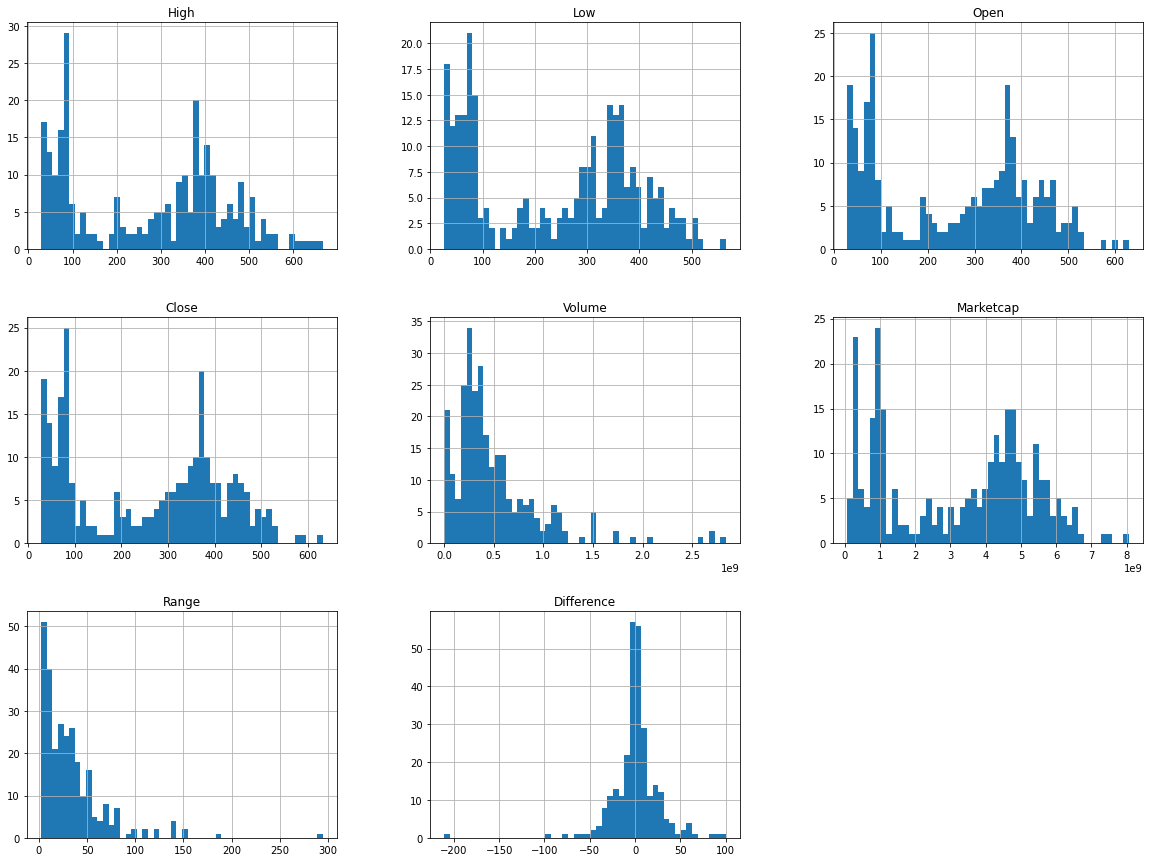

In [25]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [26]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,226,228,222,211,259,235,195,234,141,230
Date,2021-05-19 23:59:59,2021-05-21 23:59:59,2021-05-15 23:59:59,2021-05-04 23:59:59,2021-06-21 23:59:59,2021-05-28 23:59:59,2021-04-18 23:59:59,2021-05-27 23:59:59,2021-02-23 23:59:59,2021-05-23 23:59:59
Difference,-210.862344,-94.107846,-78.266219,-65.990885,-59.927101,-51.226486,-48.1064,-45.219897,-41.287456,-40.29916


In [27]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,122,231,221,121,225,208,238,203,227,111
Date,2021-02-04 23:59:59,2021-05-24 23:59:59,2021-05-14 23:59:59,2021-02-03 23:59:59,2021-05-18 23:59:59,2021-05-01 23:59:59,2021-05-31 23:59:59,2021-04-26 23:59:59,2021-05-20 23:59:59,2021-01-24 23:59:59
Difference,100.145209,91.254019,85.640269,64.502407,60.048459,59.000155,58.501616,57.513653,55.93584,54.236209


In [28]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [31]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [32]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

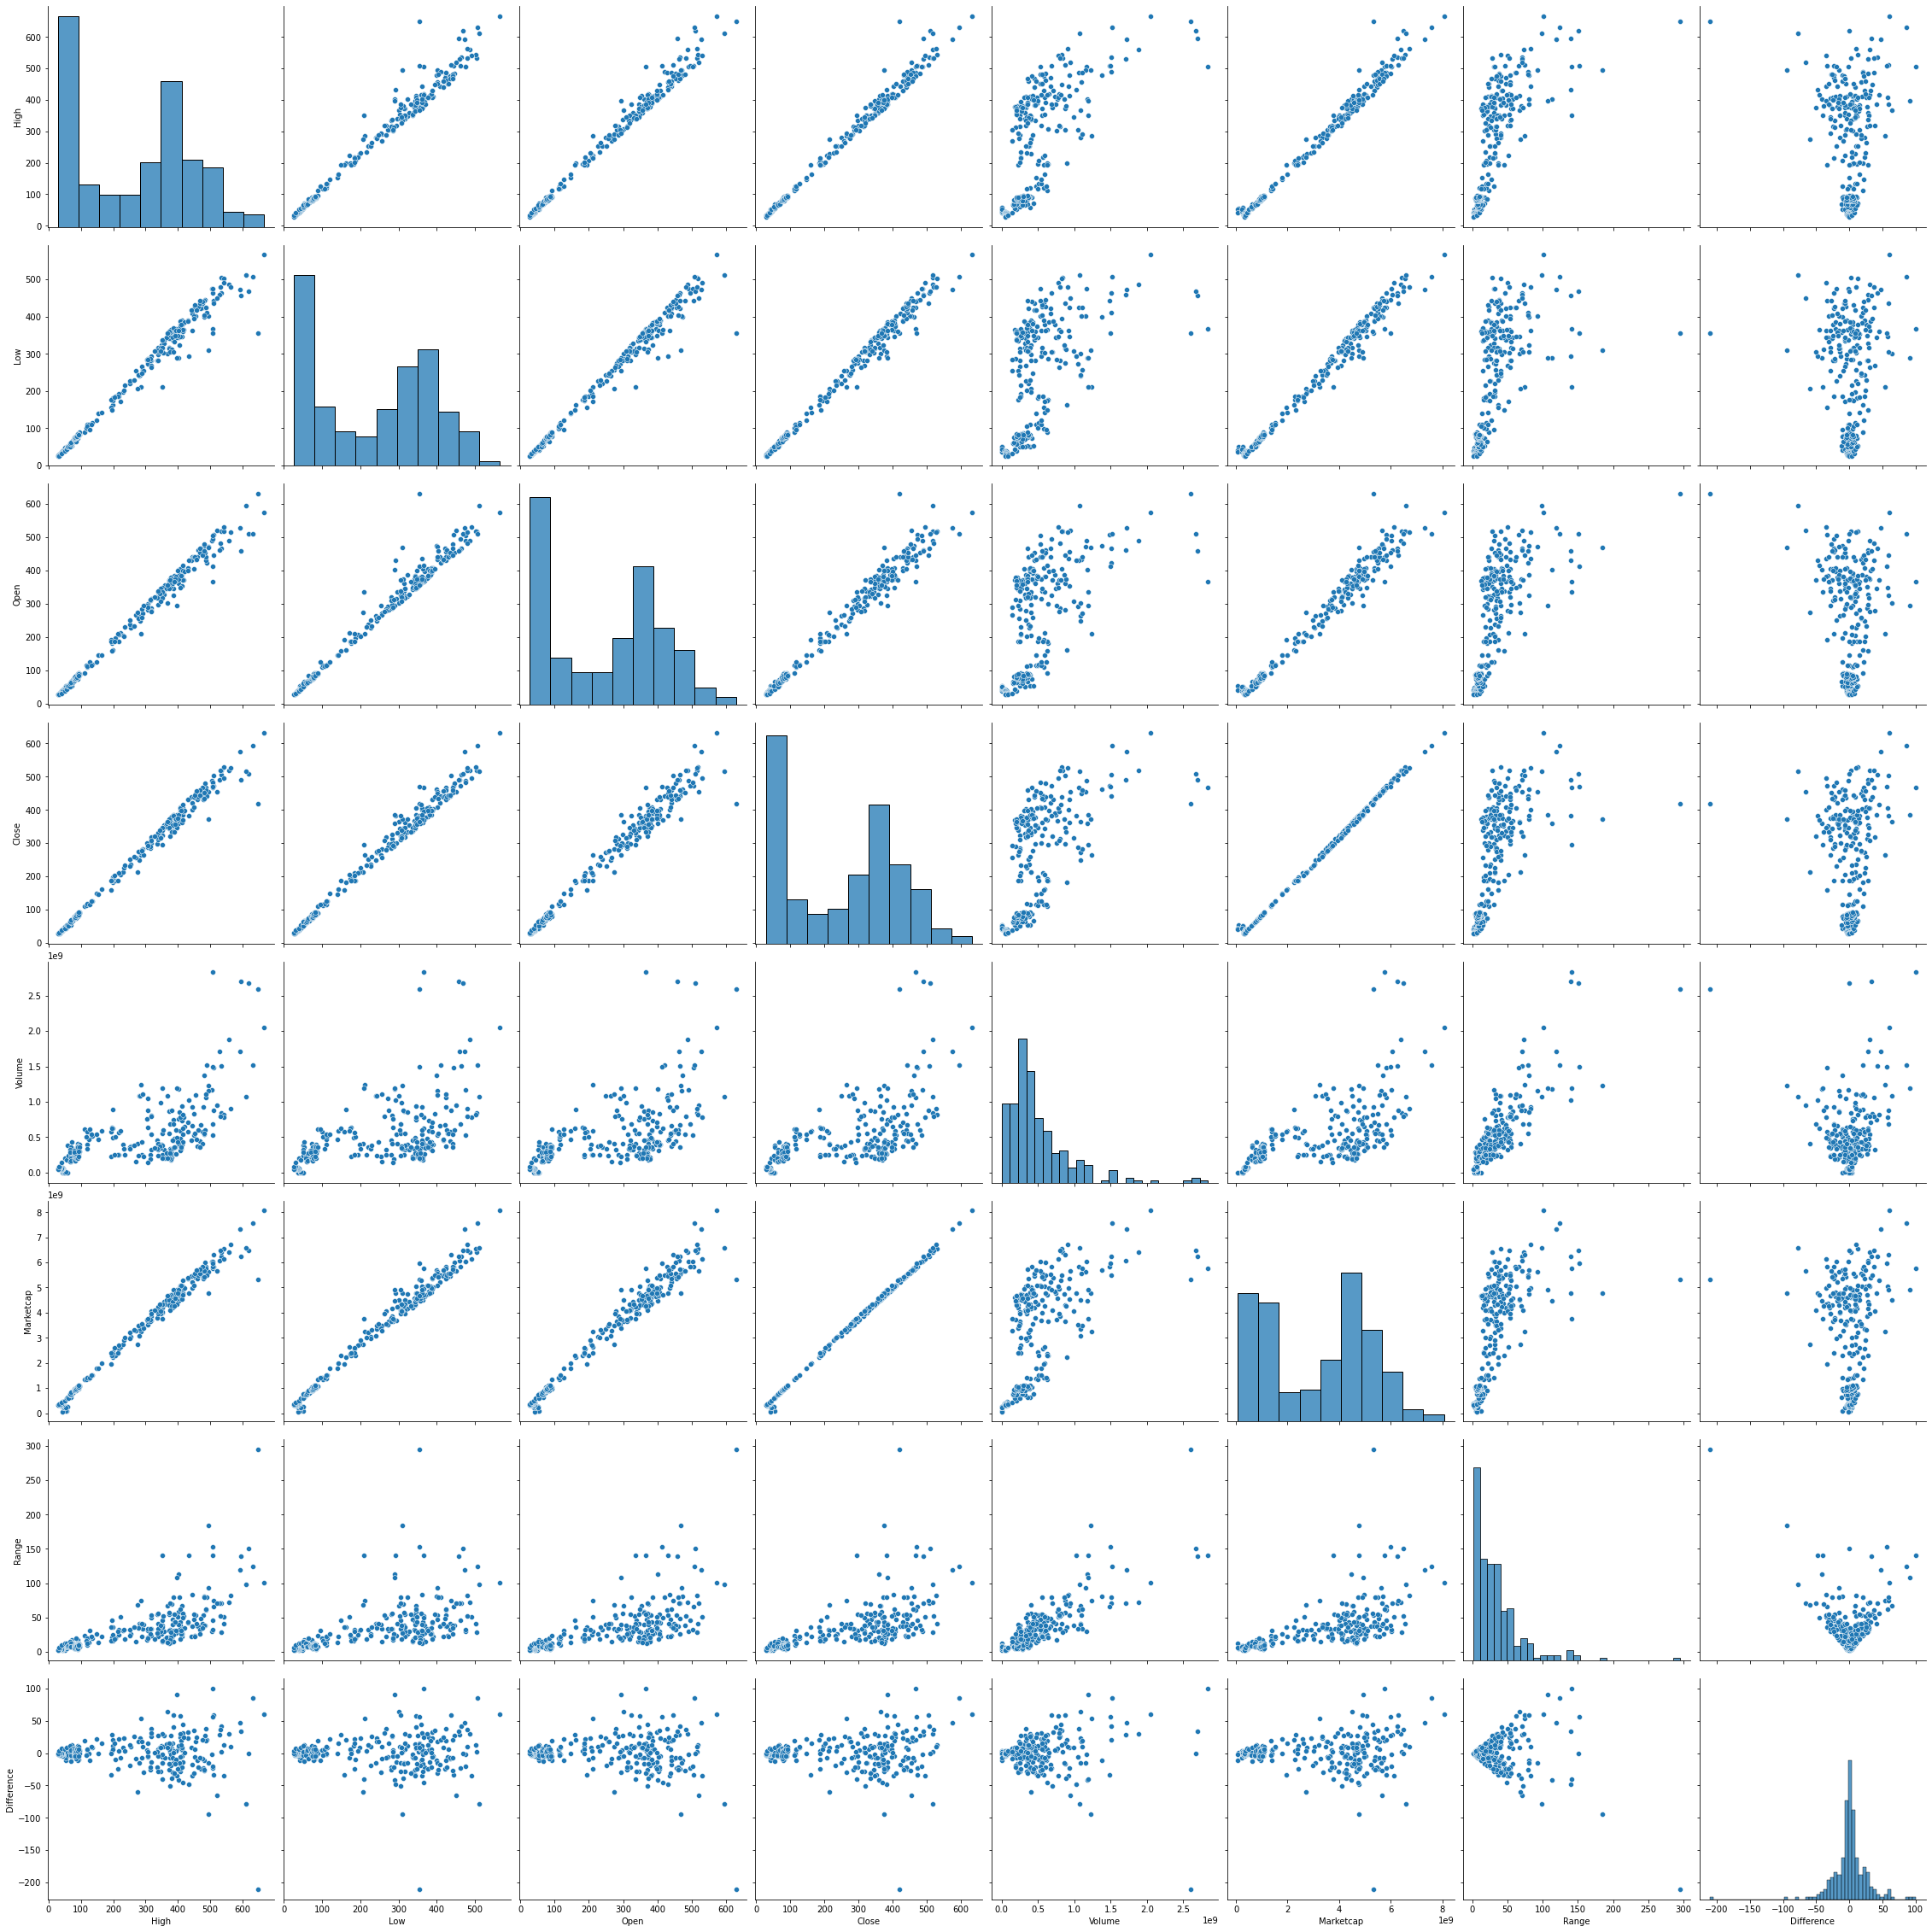

In [35]:
sns.pairplot(data,height=4);
